In [23]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
    

In [59]:
def svd(A: np.array):
    row, columns = A.shape
    sigma_raw, _ = np.linalg.eig(np.dot(A, A.T)) if row < columns else np.linalg.eig(np.dot(A.T, A))
    sigma_raw = np.sort(sigma_raw)
    sigmas = np.sqrt(sigma_raw)
    S = np.diag(sigmas)
    if row < columns:
         V = matrix(np.dot(A.T, A), True)
         U = np.dot(A, np.dot(np.linalg.inv(V), np.linalg.inv(S)))
    else:

        U = matrix(np.dot(A,A.T), False)
        V= np.dot(np.linalg.inv(S), np.dot(np.linalg.inv(U),A ))
    return S, U, V

def matrix(matrix: np.array, transform:bool):
    print(matrix)
    eigenvals, eigenvectors = np.linalg.eig(matrix)
    sorted_indices = np.argsort(eigenvals)
    eigenvectors = eigenvectors[sorted_indices]
    norm_vectors, _ =  np.linalg.qr(eigenvectors)
    print(norm_vectors)
    return np.transpose(norm_vectors) if not transform else norm_vectors

    


In [60]:
def test_svd(A):

    S, U, V = svd(A)
    reconstructed_A = np.dot(np.dot(U, S), V)
    print("Original matrix A:\n", A)
    print("\nReconstructed matrix A:\n", reconstructed_A)


A = np.array([[1, 2], [3, 4]])
test_svd(A)

[[ 5 11]
 [11 25]]
[[-0.9145143   0.40455358]
 [ 0.40455358  0.9145143 ]]
Original matrix A:
 [[1 2]
 [3 4]]

Reconstructed matrix A:
 [[1. 2.]
 [3. 4.]]


In [50]:
ratings = pd.read_csv(r'C:\Users\kvita\PycharmProjects\ala-lab-3\ml-latest-small\ratings.csv')
ratings_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix = ratings_matrix.dropna(thresh=200, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=60, axis=1)
ratings_matrix

movieId,1,2,32,47,50,110,150,223,260,293,...,6365,6377,6539,6874,7153,7361,7438,8961,33794,58559
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,5.0,5.0,4.0,NaN,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,4.0,4.0,1.0,5.0,4.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,3.5,3.0,4.0,4.5,5.0,4.5,NaN,4.0,4.0,4.5,...,3.5,4.0,4.5,3.5,4.5,4.0,3.5,3.5,4.5,4.0
19,4.0,3.0,4.0,3.0,NaN,NaN,NaN,3.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,4.0,NaN,3.0,NaN,NaN,1.0,NaN,3.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,4.0,3.5,NaN,NaN,NaN,3.0,5.0,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,3.5,NaN
606,2.5,NaN,4.0,3.0,4.5,3.5,NaN,4.5,4.5,4.5,...,2.0,4.0,3.0,4.5,4.5,4.0,4.5,4.0,NaN,NaN


In [52]:
ratings_matrix_filled = ratings_matrix.fillna(2.5)
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k=3)
U = pd.DataFrame(U)
U.columns = ['1','2','3']

V = pd.DataFrame(Vt)
V

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-0.143383,-0.029572,0.066013,0.040799,0.049077,-0.053495,-0.057172,0.111560,-0.240316,0.055474,...,0.026773,0.003814,-0.060355,0.117115,-0.049088,0.146154,0.158558,0.006264,0.031287,-0.016949
1,0.009380,0.022643,0.025328,-0.027248,-0.006077,0.008105,0.031574,0.072037,0.014746,-0.031071,...,-0.085210,-0.155450,-0.159775,-0.165811,-0.217267,-0.157040,-0.132818,-0.111624,-0.112064,-0.184581
2,-0.020103,0.127275,-0.064030,-0.092866,-0.141863,-0.043035,0.057945,0.026797,-0.174721,-0.024266,...,0.111087,0.037940,0.034989,-0.020693,-0.029177,-0.001614,-0.019333,0.043107,0.030765,-0.003016


Text(0.5, 0.92, 'Users')

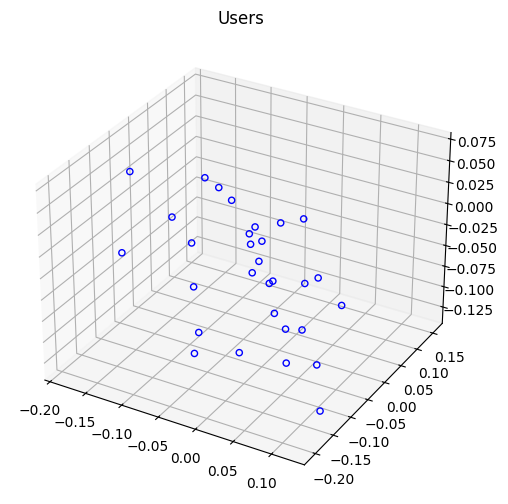

In [53]:
x = U['1'].tolist()[:30]
y = U['2'].tolist()[:30]
z = U['3'].tolist()[:30]

fig = plt.figure()
fig.set_size_inches(8, 6)
ax = fig.add_subplot(111, projection='3d')
for i in range(len(x)):
    ax.scatter(x[i], y[i], z[i], marker='o', edgecolors='b', facecolors='none')

ax.set_title('Users')

Text(0.5, 0.92, 'Films')

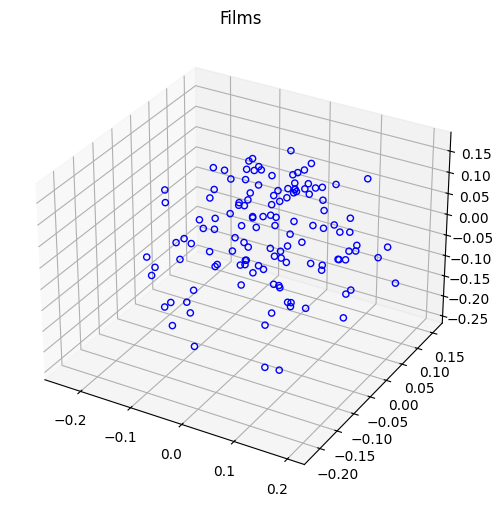

In [54]:
x = V.iloc[0].tolist()
y = V.iloc[1].tolist()
z = V.iloc[2].tolist()

fig = plt.figure()
fig.set_size_inches(8, 6)
ax = fig.add_subplot(111, projection='3d')
for i in range(len(x)):
    ax.scatter(x[i], y[i], z[i], marker='o', edgecolors='b', facecolors='none')

ax.set_title('Films')